<a href="https://colab.research.google.com/github/REBEISamy/hello-galaxy/blob/main/KC_House_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df=pd.read_csv("/content/kc_house_data.csv", sep=',')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

here we have to check if we have a NaN values 

In [ ]:
df = df.drop(['id', 'date'], axis = 1) 

drop the identifier and the date column because they have no importance in predicting the price

##Data Visualization

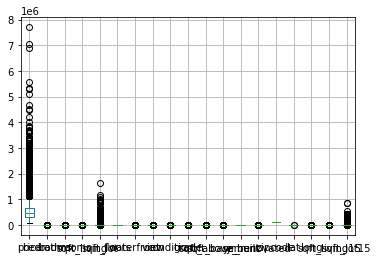

In [ ]:
df.boxplot()

here we have checked the outliers

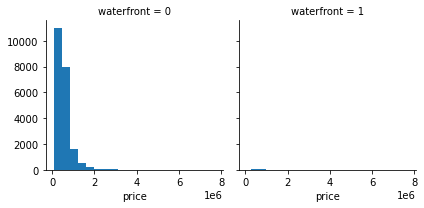

In [ ]:
g= sns.FacetGrid(df,col='waterfront')
g.map(plt.hist,'price',bins=20)

here have to check the correlation between the waterfront and the price
every time we get closer to the mother the price increases

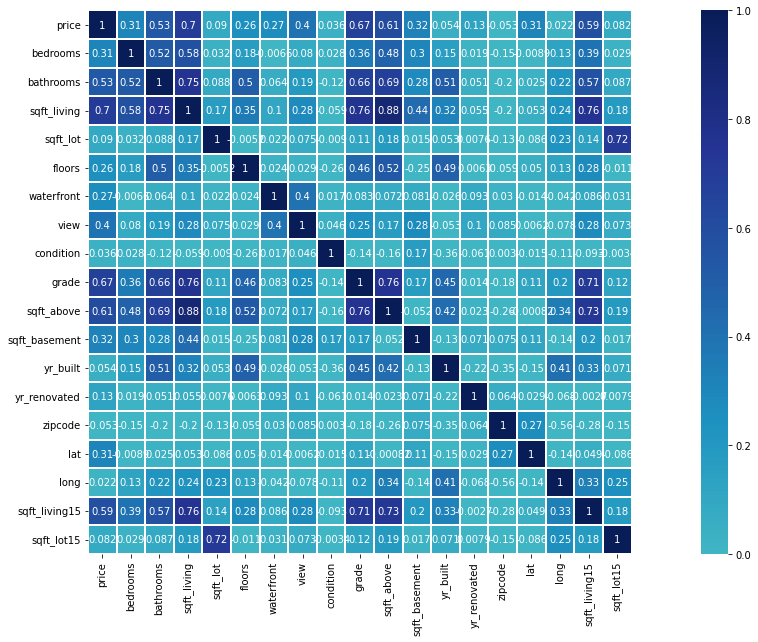

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(25,10)) 
ax = sns.heatmap(corrMatrix, vmin=0, vmax=1, center=0, annot=True,
                 cmap="YlGnBu", linewidths = 1.0,
                 square=True)

plt.show()

### Crée un modele et le splitter

In [ ]:
x = df['sqft_living']
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=40)

In [ ]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

##la régression linéaire

In [ ]:
md=LinearRegression()
md.fit(x_train,y_train)
pred=md.predict(x_test)

print("MSE", mean_squared_error(y_test,pred))
print("R squared", metrics.r2_score(y_test,pred))

MSE 64028973457.875786
R squared 0.503447918566789


##Tracé de la regression lineaire

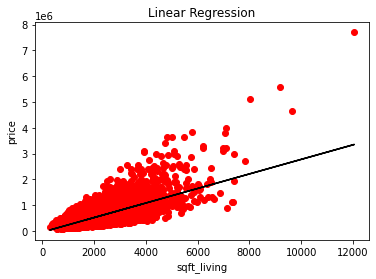

In [ ]:
plt.scatter(x_test,y_test,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_test,md.predict(x_test),color="k")
plt.show()

##Crée un model et le splitter (regression multilineaire)

In [ ]:
features = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
x = df[features]
y = df['price']
x_train=np.arange(0,len(x_train),1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=40)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 39064491790.45181
R squared 0.6970503560947929


In [ ]:
x_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21568,4,3.50,3830,8963,2.0,0,0,3,10,3120,710,2014,0,98004,47.5990,-122.197,2190,10777
3040,4,2.50,2750,16139,2.0,0,0,3,9,2750,0,1989,0,98075,47.5843,-122.060,2810,13093
198,3,2.50,1910,66211,2.0,0,0,3,7,1910,0,1997,0,98024,47.5385,-121.911,2330,67268
16456,3,2.00,1730,38884,1.0,0,0,3,8,1730,0,1997,0,98038,47.4164,-121.951,2130,91040
19502,5,3.00,2420,11250,2.0,0,0,3,8,2420,0,2013,0,98146,47.5082,-122.362,1510,9950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18129,3,2.00,1620,9566,1.0,0,0,4,7,1620,0,1968,0,98059,47.4740,-122.146,1660,10011
7417,4,3.00,1900,9077,2.0,0,0,3,7,1900,0,1954,2015,98155,47.7684,-122.304,1900,12868
3388,4,2.75,2850,7510,2.0,0,0,3,8,2850,0,2008,0,98125,47.7097,-122.305,1510,8833
18694,4,2.50,2950,48351,2.0,0,0,3,10,2950,0,1986,0,98075,47.5938,-122.048,2870,34417


In [ ]:
mdd = LinearRegression()
poly = PolynomialFeatures(degree=2)
poly.fit_transform(x_train)
model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly.fit_transform(x_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred , y_test)

In [ ]:
print("MSE : ",mse)
print("R squared", metrics.r2_score(y_test,predicted))

MSE :  39064491790.45181
R squared 0.6970503560947929
